**Задание 1.**
# РАСПОЗНАВАНИЕ И ОБРАБОТКА ВРЕМЕННЫХ РЯДОВ

Обсудим проблемы, которые могут возникнуть при предварительной обработке временных рядов. Некоторые из таких проблем хорошо знакомы опытным аналитикам, но к ним не относятся трудности выбора временных меток. Как и в любой другой задаче анализа данных, очистка и предварительная обработка данных являются залогом правильной расстановки временных меток. Каким бы хорошим ни был метод, он не будет работать с неупорядоченными данными.

Большинству аналитиков приходится либо находить, выравнивать, очищать и сглаживать собственные данные для последующего анализа в виде временных рядов, либо заняться решением совершенно иных задач. При подготовке данных приходится решать множество вопросов: от объединения разрозненных столбцов и повторной выборки нерегулярных или отсутствующих данных до выравнивания временных рядов с разными временными осями. Здесь мы поможем вам создать содержательный и правильно подготовленный набор временных рядов.

Рассмотрим следующие операции по поиску и очистке временных рядов:
* Поиск временных рядов в онлайн-хранилищах;
* Обнаружение и извлечение временных рядов из источников, изначально не предназначенных для хранения временных рядов;
* Решение типичных проблем обработки временных рядов, в частности трудностей расстановки временных меток.

Вы научитесь обнаруживать и подготавливать источники временных рядов к последующему анализу.
## **Источники временных рядов**
Ответ на вопрос, где можно найти временной ряд и как его очистить от лишних данных, зависит от преследуемой цели.
*   Поиск подходящего набора данных для обучения или тестирования;
*   Создание набора временных рядов из существующих данных, которые не имеют явно выраженной временной ориентации.

В первом случае уже собранные кем-то наборы данных с известными контрольными показателями используются для проверки правильности проведения анализа. Чаще всего они представлены конкурсными наборами данных (такими, как Kaggle) или наборами данных, хранящихся в репозиториях. Получив такой набор, вам требуется дополнительно подготовить его — очистить для собственных целей даже несмотря на то, что тот прошел некую предварительную обработку.

Во втором случае для получения информативных временных рядов вам нужно распознать в имеющемся наборе данных значения, снабженные временными метками, преобразовать их в ряды, очистить и выровнять с другими данными, имеющими временные метки. Я буду называть данные, извлеченные из таких источников, полученными временными рядами (это мой собственный, а не технический термин).

Далее мы обсудим как подготовленные наборы данных, так и полученные временные ряды.
## **Подготовленные наборы данных**
Лучший способ освоить аналитические методы или приемы моделирования — применить их к разным наборам данных и посмотреть, к каким результатам это приведет и как их можно использовать в собственных целях. Проще всего проводить такое обучение на заранее подготовленных наборах данных.

Несмотря на то что временные ряды встречаются повсюду, найти необходимые данные далеко не всегда так просто, как того хотелось бы. Если вы часто оказываетесь в таком положении, обратитесь за помощью к распространенным репозиториям временных рядов. Далее мы рассмотрим несколько наиболее примечательных вариантов.
## **Репозиторий UCI Machine Learning**
 [Репозиторий UCI Machine Learning](https://perma.cc/M3XC-M9HU) (рис. 1) содержит около 80 временных рядов, начиная с ежечасных показателей качества воздуха в итальянском городе и журналов доступа к файлам Amazon и заканчивая записями об активности, рационе питания и уровне сахара в крови больных диабетом. Это очень разнотипные сведения — просмотр файлов показывает, что они отражают различные способы временной регистрации данных, но все они представлены временными рядами.


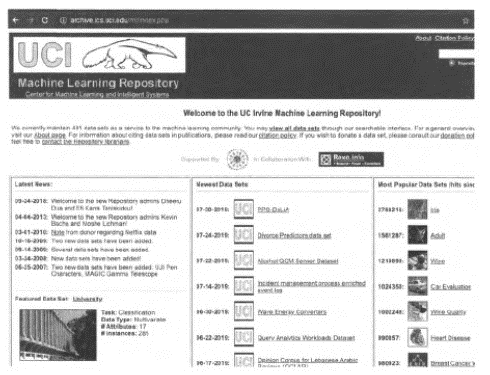

Рассмотрим  [первый набор данных](https://perma.cc/8E7D-ESGM), относящийся к категории Time Series (Временные ряды) репозитория UCI Machine Learning, в котором приведены сведения о прогулах на рабочем месте (рис. 2).

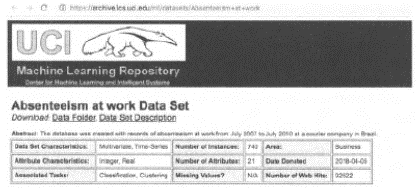

Беглый просмотр данных показывает, что в наборе данных присутствуют такие столбцы с временными данными, как Month of absence (Месяц отсутствия), Day of the week (День отсуствия) и Seasons (Времена года), но нет столбца, указывающего год события. Кроме того, в отдельном столбце указываются имена сотрудников с продублированными в некоторых временных индексах показателями.

Наконец, в нескольких дополнительных столбцах приводятся важные сведения о сотрудниках.

Набор данных может показаться довольно сложным для обработки, поскольку сначала нам необходимо определить, все ли данные были получены за один год или они собирались несколько раз с 1 по 12 месяцы в течение нескольких лет. Необходимо также решить, как должно подсчитываться общее количество прогулов — по временным индексам или идентификаторам сотрудников, перечисленных в наборе данных. В первом случае мы получим всего один временной ряд, тогда как во втором случае у нас будет сразу несколько временных рядов с перекрывающимися временными метками. Способ представления данных зависит от вопроса, ответ на который мы хотим получить.

Сравните набор данных о прогулах на рабочем месте с другим набором данных, приведенным в начале списка Time Series, — [о знаках австралийского языка жестов](https://perma.cc/TC5E-Z6H4), полученных и описанных с помощью контроллера Nintendo PowerGlove. Данные хранятся в виде набора больших CSV-файлов, каждый из которых помещается в отдельную папку, название которой отражает имя человека, демонстрирующего описываемый файлом знак.

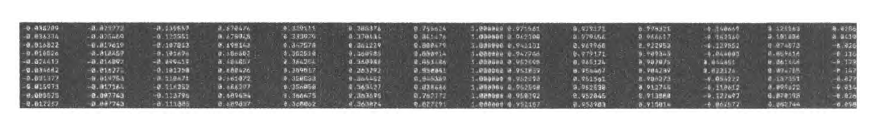

*Рис. 3. Первые несколько строк набора данных, описывающего австралийский язык жестов. Как видите, набор включает огромное количество значений. В этом наборе данных столбцы не имеют названий, а их значения не содержат временных меток. Тем не менее он представляет собой временной ряд, поскольку на оси отмечены временные шаги, совершаемые только в одном направлении (вперед), независимо от точного времени совершения событий. Заметьте, что здесь распознавание временных рядов не требует использования единиц измерения времени; достаточно выделить общую последовательность, а не точные временные индексы. В этом случае все, что вас интересует, — это порядок следования событий и подтверждение того, что измерения проводились через регулярные промежутки времени, о чем можно узнать из описания данных.*


Проводя анализ обоих наборов данных, заметили, что их обработка сопряжена с самыми разными трудностями. Перечислим наиболее важные проблемы, с которые нам довелось встречаться:
* Неполный набор временных меток
* Временная ось может быть направлена горизонтально или вертикально
* Различные концепции представления времени
## **Репозиторий UEA and UCR Time Series Classification**

Хранилище UEA and UCR Time Series Classification — это проект, предоставляющий на ваше суждение стандартные наборы временных рядов, обычно применяемых при изучении методов и алгоритмов классификации данных. Репозиторий также включает сильно различающиеся наборы данных. В этом легко убедиться на примере всего двух из них.

Первый рассматриваемый нами набор данных относится к [задаче классификации движений в йоге](https://perma. cc/U6MU-2SCZ). Задача классификации заключается в распознавании различий между двумя сериями фотографий, отснятых при смене поз йоги, принимаемых разными актерами. Впоследствии все полученные снимки преобразуются в одномерные ряды данных. Данные сохраняются в файле формата CSV, в котором крайний слева столбец отводится для подписей данных, а в остальных столбцах представлены отдельные временные шаги. Ось времени направлена слева направо вдоль строк, а не сверху вниз — вдоль строк.

Графики двух произвольно выбранных временных рядов для актеров каждого пола показаны на рис. 4.

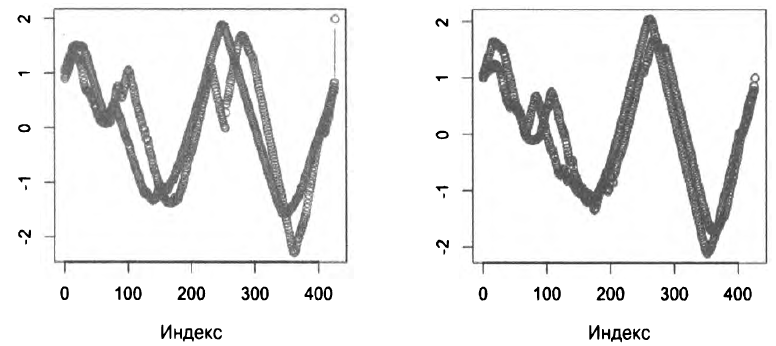

*Рис. 4. Повторяющиеся графики, описывающие движения при смене поз в йоге актерами мужского и женского полов. Движения каждого актера представлены двумя временными рядами. На оси х явные временные метки не указаны. Их абсолютные значения не столь важны, как равномерность размещения точек данных вдоль оси х, как в данном случае*

Одномерный и многомерный временные ряды Рассматриваемые до сих пор наборы данных представлялись одномерными временными рядами, т.е. характеризовались всего одной изменяемой во времени переменной.

Многомерные временные ряды включают несколько таких переменных, измеренных в каждой временной метке. Они особенно богаты информацией, потому что часто переменные взаимосвязаны и демонстрируют временные зависимости друг от друга. Мы познакомимся с многомерными временными рядами немного позже.

Следующим рассмотрим набор данных, в котором [сорта вин классифицированы по регионам в соответствии с формой их спектрограммы](https://perma.cc/CJ7A-SXFD). Что же делает такой набор данных пригодным для анализа методами временных рядов? В нашем случае спектрограмма представляет собой график зависимости интенсивности поглощения от длины световых волн.

Как видите, задача классификации временных рядов не предполагает рассмотрение временного измерения. Однако метод анализа временных рядов применим и здесь, поскольку значения на оси х уникальны, равномерно распределены и заданы через строго заданные интервалы. Заметьте, что в этом методе, в отличие от метода перекрестного анализа, учитывается дополнительный фактор, определяющий способ упорядочивания значений вдоль оси х, например время, длина волны и т.д. Пример графика “временного” ряда, в котором временное измерение отсутствует, приведен на рис. 5. Как видите, оси времени на нем действительно нет, но набор данных выглядит более чем упорядоченным, поэтому к нему можно смело применять стандартные методы обработки временных рядов.

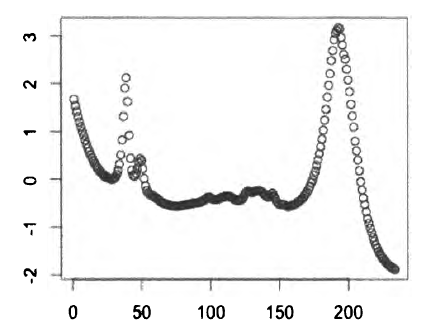

*Рис. 5. Образец спектра вина, взятый из набора данных. Пики на кривой указывают длины волн, характеризующихся особенно большими уровнями поглощения. Длины волн равномерно задаются вдоль оси х, тогда как ось у, также имеющая линейный масштаб, определяет уровень поглощения. Для сравнения таких графиков подходят любые методы анализа временных рядов*

## **Наборы временных рядов, предоставляемые правительственными организациями**
Правительство США собирает данные, представленные временными рядами, на протяжении десятилетий, а в отдельных случаях даже столетий. Например, Национальные центры информации об окружающей среде (National Centers for Environmental Information — NOAA) (https://perma.cc/EA5R-TP5L) регулярно публикуют данные о температуре и осадках, собираемые с интервалом 15 минут со всех метеостанций США. Статистическое управление (Bureau of Labor Statistics) (https://www.bls.gov/) предоставляет ежемесячные сведения об изменении уровня безработицы во всех регионах страны. Центры по контролю и профилактике заболеваний (Centers for Disease Control and Prevention) (https: //perma. cc/Y6KG-T948) издают еженедельные отчеты о количестве переболевших гриппом в текущем сезоне. Федеральный резервный банк Сент-Луиса (https://fred.stlouisfed.org) предоставляет в открытый доступ необычайно полезный набор экономических временных рядов.

Обращаясь к данным правительственных организаций в процессе обучения методам анализа временных рядов, лучше всего использовать их только для знакомства и построения информативных графиков. Детальное изучение таких наборов данных может вызывать серьезные трудности, как как они описывают чрезвычайно сложные задачи. Например, многие экономисты посвящают всю свою карьеру разработке моделей предсказания уровня безработицы, но получаемые ими результаты очень часто расходятся с официально опубликованными.

Для правительственных организаций составление точных прогнозов, которые сводятся к решению сложных вычислительных задач, является не только социально выгодным, но и жизненно необходимым занятием. К решению таких задач привлекаются многие высококвалифицированные исследователи, но пока что им не удалось достичь действительно значимых результатов. Работать над непростыми задачами очень увлекательно, но обучаться на них невероятно сложно.
## **Временные ряды в данных, предоставляемых правительственными организациями**
На государственных сайтах, подобных упомянутым выше, нетрудно найти превеликое множество актуальных и многообещающих наборов данных. Собираемые правительственными организациями данные могут послужить прекрасным источником необычайно интересных временных рядов. Например, используя их, можно построить параллельные временные ряды с экономическими и климатическими показателями или отследить взаимосвязь между различного рода правонарушениями и структурой государственных расходов. Для выполнения таких задач вам придется научиться извлекать и комбинировать данные из нескольких совершенно разных наборов.

По целому ряду причин обращаться к временным рядам, полученным с сайтов правительственных организаций, следует крайне предусмотрительно. Принятые в них условные обозначения, названия столбцов и даже их назначение часто изменяются без предупреждения и специального оглашения. Решения о запуске и завершении правительственных проектов часто принимаются спонтанно под влиянием политических, финансовых и других не менее непредсказуемых факторов. Кроме того, данные на правительственных сайтах могут представляться в самых неожиданных форматах, а сами наборы, в отличие от предоставляемых коммерческим сектором, не отличаются хорошей структурой и последовательностью. Все это сильно усложняет дальнейшее использование предоставляемых в широкий доступ временных рядов.

***Дополнительные источники данных***

Вам обязательно нужно познакомиться с приведенными далее репозиториями.

[CompEngine](https://comp-engine.org/)

Эта самоорганизующееся хранилище данных содержит более 25 тысяч баз временных рядов, которые насчитывают почти 140 миллионов отдельных точек данных. Назначение этого хранилища данных и связанного с ним программного обеспечения, снабженного отдельным веб-интерфейсом, состоит в организации и сопровождении системы сравнительного анализа временных рядов (highly comparative time-series analysis — hctsa). Такой анализ проводится с целью выявления в исходных наборах данных всех возможных типов временных зависимостей, специфичных для указанной предметной области.

Пакеты Мсотр и М4сотр2018 языка R

https://cran.r-project.org/web/packages/Мсотр/index.html

https://github.com/carlanetto/M4comp2018

Эти пакеты языка R включают наборы данных, предоставляемые участникам конкурса М, проводимого в 1982 году (1001 временной ряд), а также конкурсов М3 (3003 временных ряда) и М4 (100 000 временных рядов), проводимых соответственно в 2000 и 2018 годах. Упомянутые выше соревнования по анализу временных рядов уже рассматривались в контексте попыток профессора Роба Хайндмана получить точные методы прогнозирования временных рядов. Дополнительные наборы данных, предоставляемые участникам в других соревнованиях по прогнозированию временных рядов, включены в пакет tscompdata (https://github.com/robjhyndman/tscompdata). Наконец, более специализированные наборы временных рядов можно найти во вспомогательных пакетах языка R, доступных для загрузки из раздела Time Series Data (Данные временных рядов) репозитория CRAN (https//perma. cc/2694-D7 9К).

Полученные временные ряды

Концепция полученного временного ряда рассматривалась нами ранее. Она заключается том, что такой временной ряд извлекается из самых разных источников данных. Если быть предельно точным, то такой временной ряд строится из отдельных точек данных, достаточных для его получения, без каких-либо принимаемых в расчет допущений. Ярким примером является объединение временных рядов с данными о транзакциях некого клиента, извлекаемых из общей реляционной базы данных транзакций компании. В таком случае временной ряд может быть построен только потому, что в базе данных хранятся временные значения, которые можно использовать в качестве временных меток или их аналогов. Из исходного набора данных всегда можно извлечь совершенно иные временные ряды, например временной ряд общего для компании дневного объема транзакций или общих недельных поступлений от клиентов женского пола. Более того, подобным образом можно получить временной ряд нескольких переменных, например представляющий сведения об общих недельных поступлениях от всех клиентов в возрасте до 18 лет, общих недельных поступлений от клиентов женского пола старше 65 лет и общих недельных расходах на рекламу.

В таком временном ряду на каждом временном шаге указываются сразу три индикатора, т.е. он представляет данные трех переменных. Поиск временного ряда в структурированных данных, который в явном виде в них не содержится, выполняется очень просто, если такие данные снабжены временными метками. Ниже приведено несколько примеров задания временных меток в стандартных базах данных.

***Временные метки событий***

Если в данных присутствуют временные метки, то есть все основания утверждать, что на их основе можно создать временной ряд. Вы получите временной ряд даже в случае регистрации одного только времени доступа к рабочим файлам без указания любой другой информации. В этом случае вы можете сопоставить каждую из временных меток с ее разностью с более поздней временной меткой так, что результирующий временной ряд будет состоять из значений времени на оси х и разности между временными метками на оси у.

Вы можете пойти дальше, вычисляя среднее значения таких разностей, суммируя их за длительные периоды или просто регистрируя для других целей.

***Вневременные измерения, в которых время заменяется другим измерением***

В некоторых случаях время не задается явным образом, но учитывается структурой набора данных. Например, данные всегда можно рассматривать как последовательность значений, отстоящих друг от друга на определенном расстоянии, которое задается экспериментально выверенным параметром, таким как смещение датчика, движущегося с известной скоростью. Если вам удастся сопоставить одну из имеющихся переменных времени, то вы получите самый настоящий временной ряд. С другой стороны, если значения одной из осей выражаются через известные соотношения с расстоянием и другой характеристикой, определяющей порядок размещения данных на другой оси (например, как в случае длин волн на рассматриваемых ранее спектрограммах сортов вин), то в вашем распоряжении находятся полноценные временные ряды.

***Физические данные***

Сбором физических показателей занимаются во многих научных дисциплинах, будь то медицина, сурдология или метеорология. Но если раньше такие данные представлялись вручную собранными записями физических сигналов, регистрируемых с помощью аналоговых устройств, то в настоящее время они сразу сохраняются в цифровом формате. Данные современных временных рядов могут храниться в совершенно неочевидных и даже необычных форматах, например в виде графических файлов или векторов одного из полей базы данных.

***Получение набора временных рядов из таблиц***

Наиболее типичный пример полученного временного ряда — это ряд, извлеченный из набора данных о состояниях и событиях, хранящегося в реляционной базе данных. Такой способ получения временных рядов также является наиболее востребованным, поскольку в традиционных реляционных базах данных по-прежнему хранится невероятно большое количество важной информации.

Представьте, что вы состоите в крупной благотворительной организации. Перед вами стоит задача определить факторы, которые можно проанализировать с помощью временных рядов.
* Реакция держателей электронных почтовых ящиков на получение новых писем с течением времени. Просматривались письма или нет?
* История членства. Были ли в истории организации периоды, когда ее ряды покидали отдельные члены?
* История платежей. Можно ли спрогнозировать время внесения добровольных взносов определенным членом организации?
Вы можете проанализировать имеющиеся данные, рассмотрев их с позиции временных рядов.
* Сгенерируйте двумерную гистограмму, отображающую количество просмотров электронных писем в зависимости от времени, отдельно для каждого члена организации, чтобы понять, появляется ли у кого-то из них усталость от работы с электронной почтой. (Подробно о роли двумерных гистограмм в анализе временных рядов будет дано в последующих занятиях)
* Проверьте, прописаны ли для членов вашей организации стандартные поведенческие шаблоны (правила), которым они должны следовать в ключевых ситуациях. Например, существует ли правило, указывающее, при каких обстоятельствах (проступках) член организации должен покинуть ее ряды (возможно, не ответил на три письма подряд)? В ходе анализа временных рядов такую задачу можно решить, установив связь между статусом членства в организации и внешними действиями.
* Задачу прогнозирования платежей легко можно свести к задаче прогнозирования временных рядов. (О классическом статистическом подходе к прогнозированию мы поговорим позже)

Как видите, самая обычная реляционная база данных может стать источником большого количества задач, решаемых с помощью временных рядов. Чаще всего разработка структуры таких баз данных ведется без учета того, что они когда-нибудь смогут использоваться в качестве источников временных рядов. В подобных случаях временные ряды приходится извлекать из отдельных таблиц и других разрозненных источников.

***Учебная задача: получение временных рядов***

Если вам посчастливилось заполучить несколько связанных источников данных, то выровняйте их, учитывая возможные различия в уровнях масштабирования значений и устранив несоответствия во временных метках. В качестве наглядного примера давайте создадим несколько наборов данных для упомянутой выше некоммерческой организации. Предположим, в вашем распоряжении находятся данные, приведенные в табл. 1.-3.


*Таблица 1. Год вступления в организацию и текущий статус членства*



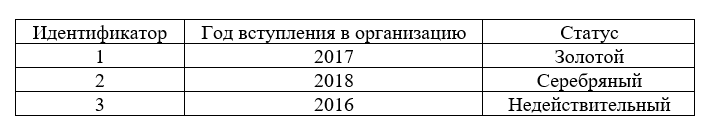

*Таблица 2. Недельное количество писем, отправленных члену организации, которые были им открыты*

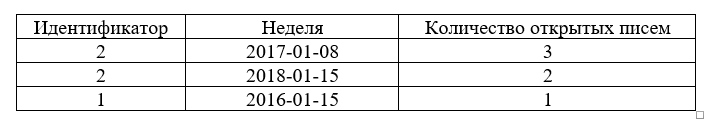

*Таблица 3. Данные о добровольных взносах*

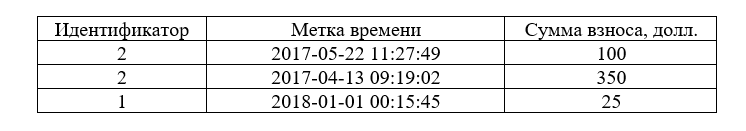

Работать с данными в простой табличной форме вам придется чаще всего. Имея такие данные, вы можете ответить на многие вопросы, например, о том, как количество открытых членом организации писем соотносится с общей суммой добровольных взносов.

Вы также можете ответить на вопросы временного характера, например внесет ли пожертвование участник вскоре после вступления в организацию или через какое-то время. Однако, не переводя эти данные в более удобный для временных рядов формат, вы не сможете распознать однозначно поведение, которое поможет в предсказании того, когда именно будет сделан взнос (скажем, на основании того, просматривались последние письма или нет).

Для анализа данных методами временных рядов нужно представить их в правильном формате. И тут мы сталкиваемся с рядом проблем, требующих обязательного решения.

Сначала в имеющихся данных необходимо определить временные оси. В предыдущих таблицах обозначены три уровня временного масштабирования.
* Годовой статус участника.
* Еженедельный подсчет открытых писем.
* Точные временные метки совершения добровольных взносов.

Кроме того, нужно удостовериться, что данные означают именно то, что, по вашему мнению, должны означать. Допустим, что вы хотите удостовериться, что текущий статус определяется его годовым, а не другим, более краткосрочным статусом. Один из способов ответить на этот вопрос — проверить, есть ли у членов организации более одной записи.


In [64]:
import pandas as pd

In [65]:

YearJoined=pd.read_csv("/kaggle/input/dataset-1lab/year_joined.csv")
YearJoined.groupby('memberID').count().groupby('memberStats').count()

,yearJoined
memberStats,
1,1000


Здесь мы видим, что все 1000 членов имеют только один статус, поэтому для всех них показатель YearJoined, скорее всего, будет указывать год вступления в организацию, а по нему будет определяться текущий статус или статус на момент вступления в организацию. Такое подробное изучение данных крайне важно для понимания области использования переменной статуса — планируя поддавать данные более глубокому анализу, необходимо внимательно исследовать их вместе с тем, кто досконально разбирается в их структуре. Если бы текущий статус члена организации применялся для анализа прошлых данных, то это считалось бы упреждением, поскольку вы вводили бы дополнительные элементы в модель временного ряда, которые на тот момент еще не были известны. Вот почему нельзя использовать переменную статуса, такую как YearJoined, в модели данных, не зная точно, когда именно она была определена.

***Что такое упреждение***

Термин упреждение используется в анализе временных рядов для обозначения любых знаний о будущем. Вы не должны располагать такими знаниями при разработке, обучении или оценке модели. Упреждение — это способ узнать из данных что-то о будущем раньше, чем полагается.

Упреждением называется принцип, согласно которому информация о том, что произойдет в будущем, может распространиться во времени и повлиять на поведение модели в прошлом. Например, выбирая гиперпараметры для модели, вы можете неоднократно протестировать ее на своем наборе данных, затем выбрать лучшую модель и начать анализ с самого начала, чтобы проверить и эту модель.

Но такой подход будет неправильным, потому что вы выбрали модель в тот момент времени, когда уже знали, что произойдет в следующий момент времени, а это самое настоящее упреждение.

К сожалению, не существует автоматизированного метода или статистического теста проверки данных на упреждение, поэтому вы должны предельно внимательно изучать их перед построением модели и дальнейшим анализом.

Если посмотреть на таблицу учета электронных писем, то легко заметить, что данные столбца week(неделя) могут указываться либо за недельные периоды, либо на моменты времени, определенные недельными временными метками.

При этом совершенно понятно, что они должны отображать информацию, собранную на протяжении недельных интервалов времени, поэтому мы должны рассматривать указанные временные значения как недельные периоды, а не как временные метки, отстоящие одна от другой на недельное расстояние.

Далее нам предстоит оценить некоторые важные характеристики данных. Например, крайне важно понимать, как формируется недельный отчет. Хотя у нас нет планов по реструктуризации таблицы, если в рассматриваемой предметной области неделя интерпретируется необычным образом, то это нужно обязательно учитывать при изучении данных. В процессе анализа человеческой деятельности календарная неделя обычно начинается с воскресенья и заканчивается в субботу или длится с понедельника по воскресенье. Все остальные варианты календарных схем, например такие, в которых рабочая неделя начинается 1 января, считаются нестандартными.

Вы также можете спросить, существуют ли пустые недели? Иначе говоря, есть ли в таблице недели, в которые участник не открыл ни одного электронного письма? Это важно знать при построении модели данных, основанной на временных зависимостях. Пустые недели должны обязательно включаться и учитываться в модели, поскольку они устанавливают такие же точки данных, как недели со значащими данными.


In [66]:
emails=pd.read_csv("/kaggle/input/dataset-1lab/emails.csv")

emails.rename(columns={"user":"member"}, inplace=True)

emails

,emailsOpened,member,week
0,3.0,1.0,2015-06-29 00:00:00
1,2.0,1.0,2015-07-13 00:00:00
2,2.0,1.0,2015-07-20 00:00:00
3,3.0,1.0,2015-07-27 00:00:00
4,1.0,1.0,2015-08-03 00:00:00
...,...,...,...
25483,3.0,998.0,2018-04-30 00:00:00
25484,3.0,998.0,2018-05-07 00:00:00
25485,3.0,998.0,2018-05-14 00:00:00
25486,3.0,998.0,2018-05-21 00:00:00


In [67]:
emails[emails.emailsOpened < 1]

,emailsOpened,member,week


Здесь существуют две возможности: либо нулевые значения не регистрируются вовсе, либо члены организации открывают в течение недели хотя бы одно электронное письмо. Любой, кто работал с электронной почтой, знает, что заставить людей открывать электронные письма сложно, поэтому гипотеза о том, что члены организации всегда открывают не менее одного письма в неделю, весьма несостоятельна. Решить проблему можно, просмотрев историю работы с электронной почтой одного пользователя.

In [68]:
emails[emails.member == 998]

,emailsOpened,member,week
25464,1.0,998.0,2017-12-04 00:00:00
25465,3.0,998.0,2017-12-11 00:00:00
25466,3.0,998.0,2017-12-18 00:00:00
25467,3.0,998.0,2018-01-01 00:00:00
25468,3.0,998.0,2018-01-08 00:00:00
25469,2.0,998.0,2018-01-15 00:00:00
25470,3.0,998.0,2018-01-22 00:00:00
25471,2.0,998.0,2018-01-29 00:00:00
25472,3.0,998.0,2018-02-05 00:00:00
25473,3.0,998.0,2018-02-12 00:00:00


Как видите, отдельные недели не указаны в списке. После 18 декабря 2017 года до конца года событий, связанных с электронной почтой, не зарегистрировано.

В этом можно удостовериться, подсчитав количество еженедельных наблюдений между первым и последним событиями для рассматриваемого члена организации. Сначала рассчитаем срок его членства в неделях.


In [69]:
member_emails = emails[emails["member"] == 998]

first_event_date = pd.to_datetime(member_emails["week"].min())
last_event_date = pd.to_datetime(member_emails["week"].max())

num_weeks = (last_event_date - first_event_date).days / 7

print(num_weeks)

25.0


Затем для этого члена организации нужно определить количество недель, для которых заданы учетные данные.

In [70]:
emails[emails.member == 998].shape

(24, 3)

Мы насчитали 24 строки, а их должно быть 26. Это указывает на то, что для этого члена организации не приведены данные за несколько недель. Между прочим, мы могли выполнить такой расчет для всех членов организации сразу, обратившись к групповым операциям, но в нашем примере целесообразно ограничиться всего одним членом организации.

***Почему 26 строк?***

Вас может удивить, что мы говорим о 26, а не о 25 строках, как того требует обозначенная выше операция вычитания. Поступив иначе, мы совершим ошибку, и вот почему. Работая с временными рядами, после вычитания точек данных нужно спросить себя, нужно ли добавлять единицу к полученному результату, чтобы учесть начальное смещение? Иначе говоря, нужно ли вычитать позицию, которая учитывается в данных?

Рассмотрим следующий пример. Допустим, в модели данных приведена информация для 7, 14, 21 и 28 апреля. Необходимо определить общее количество учитываемых точек данных. Вычитание 7 из 28 и деление на 7 дает 21/7, что равно 3. При этом вполне очевидно, что данные должны представляться четырьмя точками. В самом начале вычиталась точка 7 апреля, но ее нужно вернуть обратно в модель, поэтому правильный расчет — это разница между первым и последним днями, разделенная на 7 плюс 1 для учета вычтенной даты начала.

Вернемся к задаче заполнения пробелов для получения полного набора данных. Нам удалось выяснить, что в наборе действительно есть недостающие данные — для некоторых недель они просто не указаны. Мы не можем точно идентифицировать все пропущенные недели, поскольку некоторые из них могли предшествовать самой ранней зарегистрированной дате или следовать после самой последней даты списка. Однако мы можем заполнить пропущенные значения между начальной и конечной временными точками, в которых член организации открывал хотя бы одно электронное письмо.

Намного легче заполнить все недостающие недели для всех участников сразу, используя функции индексации пакета Pandas. Можно сгенерировать объект Multiindex из фрейма данных Pandas, который представляет все комбинации
недель и членов организации, т.е. их декартово произведение.


In [71]:
complete_idx = pd.MultiIndex.from_product([emails["week"].unique(), emails["member"].unique()], names=["week", "member"])
emails_group = emails.groupby(["week", "member"]).sum().reset_index()
# Переиндексация DataFrame с использованием complete_idx
complete_emails = emails_group.set_index(["week", "member"]).reindex(complete_idx, fill_value=0).reset_index()

# Вывод результата
print(complete_emails)

                      week  member  emailsOpened
0      2015-06-29 00:00:00     1.0           3.0
1      2015-06-29 00:00:00     3.0           0.0
2      2015-06-29 00:00:00     5.0           0.0
3      2015-06-29 00:00:00     6.0           0.0
4      2015-06-29 00:00:00     9.0           0.0
...                    ...     ...           ...
93242  2015-06-01 00:00:00   991.0           0.0
93243  2015-06-01 00:00:00   992.0           0.0
93244  2015-06-01 00:00:00   993.0           0.0
93245  2015-06-01 00:00:00   995.0           0.0
93246  2015-06-01 00:00:00   998.0           0.0

[93247 rows x 3 columns]


Используем полученный индекс для переиндексации исходной таблицы и заполнения пропущенных значений — в нашем случае нулем, предполагая, что если в строке ничего не записано, значит, записывать было нечего. Мы также сбрасываем индекс, чтобы заносить информацию о членах организации и неделях в отдельные столбцы, а затем присваиваем имена этим столбцам.

In [72]:
all_email = emails_group.set_index(['week','member']).reindex(complete_idx, fill_value = 0).reset_index()

Еще раз изучим данные для члена организации с индексом 998.

In [73]:
all_email.columns = ['week', 'member', 'emailsOpened' ]

In [74]:
all_email[all_email.member == 998].sort_values('week')

,week,member,emailsOpened
79771,2015-02-09 00:00:00,998.0,0.0
80310,2015-02-16 00:00:00,998.0,0.0
81927,2015-02-23 00:00:00,998.0,0.0
82466,2015-03-02 00:00:00,998.0,0.0
83005,2015-03-09 00:00:00,998.0,0.0
...,...,...,...
73303,2018-04-30 00:00:00,998.0,3.0
73842,2018-05-07 00:00:00,998.0,3.0
77076,2018-05-14 00:00:00,998.0,3.0
74381,2018-05-21 00:00:00,998.0,3.0


***Библиотека Pandas языка Python***

Pandas — пакет анализа фреймов данных в языке программирования Python, который широко используется в анализе данных. Одно только название указывает на пригодность этого пакета для анализа временных рядов: слово “Pandas” получено как сокращение термина "panel data” (панельные данные). Таким термином временные ряды обозначаются в социологии.

Библиотека Pandas основана на таблицах данных, индексируемых по строкам и столбцам. Ею поддерживаются SQL-подобные операции, такие как группировка, выбор строки и индексация по ключам. Она также снабжена специальными функциями работы с временными рядами, такими как индексация по временным периодам, прореживание и группирование данных по временным точкам.

Если вы не знакомы с пакетом Pandas, я настоятельно рекомендую ознакомиться с его основными возможностями, описанными, например, в [официальной документации](https://perma.cc/7R9B-2YPS).

Обратите внимание на большое количество нулей в начале временного ряда. Вероятнее всего, они указаны для временных периодов, в которых рассматриваемый член организации не был включен в список почтовой рассылки. Существует не так много видов анализа, в которых пустые недели являются значащими и требуют обязательного учета — особенно те недели, которые предшествовали моменту открытия членом организации первого письма корпоративной почты.

Располагая сведениями о такой дате (дате начала получения писем из рассылки), мы сможете предельно точно определить момент временной отсечки данных. Для этого внимательно изучим имеющиеся данные. Для каждого члена организации определим срезы start_date и end_date, группируя DataFrame электронной почты для каждого члена организации и выбирая максимальное и минимальное значения недели.


In [75]:
cutoff_dates = emails_group.groupby('member').week.agg(['min', 'max' ]) .reset_index()
cutoff_dates = cutoff_dates.reset_index()

Удалим из DataFrame строки, которые не вносят заметного вклада в хронологию событий, а именно — все нулевые строки перед первыми ненулевыми строками каждого члена организации.

In [76]:
for _, row in cutoff_dates.iterrows():
    member = row ['member']
    start_date = row ['min']
    end_date = row ['max']
    all_email.drop(all_email[all_email.member == member][all_email.week < start_date].index, inplace=True)
    all_email.drop(all_email[all_email.member == member][all_email.week > end_date].index, inplace=True)

/tmp/ipykernel_30/3392227592.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_email.drop(all_email[all_email.member == member][all_email.week < start_date].index, inplace=True)
/tmp/ipykernel_30/3392227592.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_email.drop(all_email[all_email.member == member][all_email.week > end_date].index, inplace=True)
/tmp/ipykernel_30/3392227592.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_email.drop(all_email[all_email.member == member][all_email.week < start_date].index, inplace=True)
/tmp/ipykernel_30/3392227592.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_email.drop(all_email[all_email.member == member][all_email.week > end_date].index, inplace=True)
/tmp/ipykernel_30/3392227592.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_email.drop(all_email[al

***Операция < или <=?***

Здесь используются операции < и > строгого неравенства, потому что объекты start_date и end date включают значащие точки данных, и мы отбрасываем, а не сохраняем данные в коде. В этом случае нам нужно включить контрольные недели в анализ, потому что они устанавливают первую и последнюю значащие точки данных.

Вам следует убедить специалистов по сбору данных и администраторов баз данных хранить информацию в хронологическом порядке, наглядно показав, как и зачем создаются временные метки. Чем больше проблем получится решить заранее, тем с меньшим количеством трудностей вы столкнетесь впоследствии.

После очистки учетных данных об активности при работе с почтой можно переходить к решению последующих задач. В частности, нужно попытаться определить связь между частотой изучения электронных писем и датой добровольных взносов, совершаемых всеми членами организации. Давайте попробуем ответить на такие вопросы.
* Просуммируем значения переменной DonationAmount по неделям, чтобы получить сопоставимые периоды времени. Теперь мы сможем проанализировать, соотносятся ли взносы каким-либо образом с частотой открытия электронных писем членами организации.
* Будем рассматривать переменную EmailOpened за предыдущую неделю как предиктор для переменной DonationAmount для текущей недели.

Очень важно исходно рассматривать именно предыдущую неделю, поскольку EmailsOpened указывает сводную статистику за всю неделю. Например, если требуется предсказать вероятность оплаты взносов в среду, а переменная EmailsOpened обозначает количество открытых электронных писем с понедельника по воскресенье, то использование информации за эту же неделю потенциально приведет к включению в расчет действий, совершаемых впоследствии (например, открытия письма в пятницу — уже после внесения пожертвований).

***Построение полученного временного ряда***

Теперь рассмотрим, как можно связать данные о работе с почтой и оплатой взносов. Можно перестроить данные о взносах, чтобы превратить их в недельные временные ряды, однозначно сопоставляемые с данными об активности членов организации при изучении почты. Нас будут интересовать еженедельные взносы, поэтому мы будем суммировать данные для временных меток, относящихся к общим недельным периодам. Более одного взноса в неделю — событие маловероятное, поэтому в большинстве случаев еженедельные суммы пожертвований будут отражать взносы индивидуальных плательщиков.


In [77]:
donations = pd.read_csv("/kaggle/input/dataset-1lab/donations.csv")
donations.drop(1530, inplace=True)
donations.at[2541, "timestamp"] += "00"
donations.timestamp = pd.to_datetime(donations.timestamp)
donations.set_index('timestamp', inplace = True)
agg_donations = donations.groupby('member').apply(lambda df: df.amount.resample("W-MON").sum().dropna())

/tmp/ipykernel_30/619205111.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg_donations = donations.groupby('member').apply(lambda df: df.amount.resample("W-MON").sum().dropna())


В этом коде мы сначала преобразуем строковый символ в соответствующий класс данных с временными метками, чтобы в дальнейшем применить функцию индексации по дате пакета Pandas. Тогда при проведении повторной выборки фрейма данных в качестве индекса можно будет использовать временные метки.

Наконец, в получаемых для каждого члена организации фреймах данных мы группируем и суммируем взносы за недельные периоды времени, отбрасываем недели, в которых не оплачивались взносы, а затем складываем их вместе.

Обратите внимание, что повторная выборка данных начинается с недели, к которой относится связанная дата, чтобы в точности сопоставить их с недельными датами в таблице данных о работе членов организации с электронной почтой.

Также обратите внимание, что неделя, начинающаяся с понедельника, — вполне разумный выбор.
Получив выборки данных о взносах и работе с электронной почтой, имеющие одинаковую периодичность, объединим их. Библиотека Pandas позволяет решить эту задачу очень просто, поскольку ранее все недели уже были привязаны к одному и тому же дню. Пройдем по всем элементам и объединим их фреймы данных.


In [78]:
for member, member_email in all_email.groupby('member'):
    member_donations = donations[donations.member == 'member']
    member_email.set_index ('week', inplace = True)
    member_email = all_email[all_email.member == member]
    member_email. sort_values('week').set_index('week')
    df = pd.merge(member_email, member_donations, how = 'left', left_index = True, right_index = True)
    df.fillna(0)
    df['member'] = df.member_x
    merged_df = pd.concat([df, df.reset_index()[['member', 'week', 'emailsOpened', 'amount']]])

На данный момент мы располагаем выровненными данными о работе с почтой и взносах каждого члена организации. Для каждого из них учитываются только значащие недели и отбрасываются те, которые предшествовали вступлению в организацию или следуют после ухода из нее.

Мы можем рассматривать работу с электронной почтой как переменную “статуса” по отношению к поведению внесения пожертвований, но, чтобы избежать упреждения, данные события должны рассматриваться с недельным смещением.

Нам нужно построить модель, в которой прогнозирование следующих взносов члена организации основано на данных о работе с электронной почтой за прошлую неделю. В этом случае события оплаты можно попробовать сопоставить с событиями просмотра полученных почтовых сообщений. Все, что нам требуется, — это поставить в соответствие текущие недельные взносы с данными о количестве открытых письмах за предыдущую неделю. Для этого нужно сдвинуть выровненные и очищенные данные из обеих таблиц на соответствующее количество недель. Задача смещения оплаты взносов на неделю вперед легко выполняется с помощью оператора сдвига, но не забывайте, что эту операцию нужно задействовать сразу ко всем членам организации.


In [79]:
df = merged_df[merged_df.member == 998]
df['target'] = df.amount.shift(1)
df = df.fillna(0)
df


,week,member_x,emailsOpened,amount,member_y,member,target
63601,2017-12-04 00:00:00,998.0,1.0,0.0,0.0,998.0,0.0
64140,2017-12-11 00:00:00,998.0,3.0,0.0,0.0,998.0,0.0
64679,2017-12-18 00:00:00,998.0,3.0,0.0,0.0,998.0,0.0
65218,2018-01-01 00:00:00,998.0,3.0,0.0,0.0,998.0,0.0
65757,2018-01-08 00:00:00,998.0,3.0,0.0,0.0,998.0,0.0
66296,2018-01-15 00:00:00,998.0,2.0,0.0,0.0,998.0,0.0
66835,2018-01-22 00:00:00,998.0,3.0,0.0,0.0,998.0,0.0
67374,2018-01-29 00:00:00,998.0,2.0,0.0,0.0,998.0,0.0
67913,2018-02-05 00:00:00,998.0,3.0,0.0,0.0,998.0,0.0
68452,2018-02-19 00:00:00,998.0,3.0,0.0,0.0,998.0,0.0


Рекомендуем сохранять результат сдвига в новом столбце, а не перезаписывать исходные данные, особенно в случаях отказа от смещения вперед временных меток в данных о суммах взносов. Мы сместим их на одну неделю вперед отдельно, используя все ту же встроенную функцию сдвига пакета Pandas. Ничто не запрещает сдвинуть временные метки на неделю назад, задавая отрицательные значения параметров. Обычно предикторов больше, чем целей, поэтому чаще сдвигаются цели. Ниже показан результат выполнения кода.

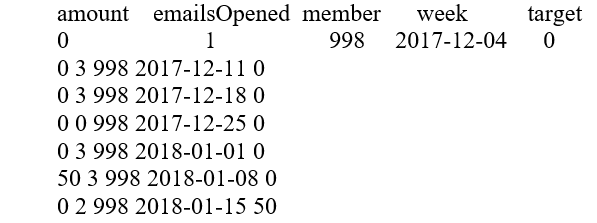


Итак, после учета пропущенных строк данные члена организации с идентификатором 998 стали насчитывать 26 строк. Набор данных стал полным и очистился от ненужной информации.

Еще раз кратко опишем принципы обработки временных рядов, использованные нами при реструктуризации данных.
1. Изменение детализации данных в соответствии с задачей. Часто данные содержат более детальную временную информацию, чем требуется.
2. Предотвращение упреждения — отказ от данных с временными метками, которые влияют на доступность данных.
3. Учет всех релевантных временных периодов, даже если в них “ничего не происходило”. Нуль так же информативен, как и любое другое число.
4. Избегание упреждения — отказ от данных с временными метками, которые предоставляют информацию, о которой пока не должно быть известно.

До сих пор мы работали с необработанными полученными временными рядами, сопоставляя данные о взносах членов организации и об их работе с электронной почтой, которые собирались с одинаковой частотой и за одинаковые временные периоды. Заметьте, что мы не прибегали к тщательной очистке этих данных или к полному их изучению перед дальнейшим анализом. Этим мы займемся позже.

***Трудности описания временных меток***

Временные метки очень важны в анализе временных рядов. По временным меткам можно экстраполировать ряд интересных признаков, таких как время суток или день недели. Изучение таких признаков сильно помогает в изучении исходных наборов данных, особенно касающихся поведения людей. Тем не менее временные метки относятся к неоднозначно представляемым данным. Далее мы обсудим некоторые трудности задания временных меток.

***Получение временных меток***

Первая задача, которую предстоит решить при изучении временных меток, заключается в определении того, каким процессом, как и когда они были сгенерированы. Очень часто происходящее событие не совпадает с регистрируемым событием. Например, в ходе работы исследователь может быстро внести новые данные в записную книжку, а добавить их в основной файл журнала формата CSV несколько позже (в конце рабочего дня). Какое время при этом будет указано в записи — добавления данных в записную книжку или в CSV-файл? Например, пользователь мобильного приложения может совершать действия, автоматически регистрируемые в журнале даже тогда, когда его телефон находится в оффлайн-режиме. На сервер данные журнала будут загружены после подключения телефона к сети, т.е. с некоторой временной задержкой. Что в таком случае отражают временные метки, передаваемые вместе с данными: время совершения пользователем действий, записи их приложением, загрузки метаданных на сервер или запрос к серверу на обновление данных приложением (или любого другого события по передаче целевых данных)?

В первую очередь, временные метки помогают выяснить, что именно описывают данные, но они оказываются бесполезными при отсутствии надлежащего их описания. Изучая временные метки, вам нужно попытаться как можно лучше определить время регистрации событий.

Проиллюстрируем трудности описания временных меток на конкретном примере. Представьте, что вы просматриваете данные, предоставленные мобильным приложением, которое помогает избавиться от лишнего веса, и наблюдаете на экране телефона записи, подобные приведенным в табл. 4.


*Таблица 2.4. Записи о потребленных блюдах, отображаемые приложением*

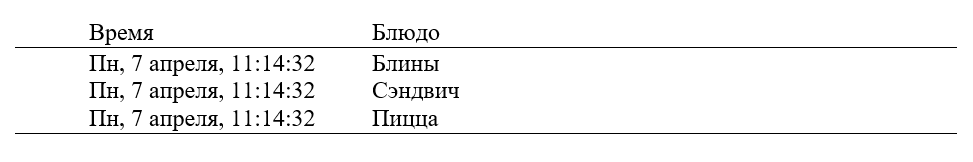

Конечно, существует вероятность, что пользователь смог съесть блины, сэндвич и пиццу за один присест, но ведь есть более реалистичные сценарии. Чтобы правильно оценить ситуацию, нужно ответить на ряд вопросов. Время приема пищи указано пользователем или оно генерируется автоматически? Предлагает ли приложение устанавливать время по шаблону, предполагающему переназначение или игнорирование значения по умолчанию? Ответы на эти вопросы могли бы объяснить одинаковые временные метки правдоподобнее, чем предположение, что пользователь, пытающийся похудеть, съедает блины, сэндвич и пиццу за время всего одного ланча.

Но даже если в 11:14 у пользователя были все эти блюда, где именно он так славно покушал? Какое время указывается в записях приложения: местное или глобальное? Даже если принять маловероятное предположение, что пользователь съел все блюда за один присест, из одних этих записей можно мало что почерпнуть о временном аспекте события. Например, мы не знаем, был ли это завтрак, обед, ужин или просто перекус. Чтобы предоставить пользователю полезную информацию о питании, нужно знать время суток, которое обозначает указанное в записях время, а для этого нужно располагать сведениями о часовом поясе места его пребывания.

Лучший способ ответить на эти вопросы — изучить код, отвечающий за сбор и хранение данных, или попросить помощи у разработчиков приложения, написавших этот код. После ознакомления со всеми доступными техническими аспектами данных вам нужно самостоятельно протестировать приложение, чтобы убедиться в том, что данные собираются именно так, как предполагается. Чем лучше вы изучите поток регистрируемых данных, тем меньше вероятность того, что у вас возникнут неправильные вопросы о назначении временных меток — вам не будет казаться, что они обозначают не то, что должны обозначать на самом деле.

Вы и только вы отвечаете за правильность трактовки данных. Люди, от которых к вам поступают данные, не знают, каким образом вы собираетесь их анализировать.

Постарайтесь как можно лучше понять, как и когда именно генерируются временные метки. Если данные получены из мобильного приложения, то загрузите и запустите это приложение, добейтесь возникновения в нем необходимого события в нескольких правдоподобных сценариях и внимательно ознакомьтесь с получаемыми данными. Пообщавшись с разработчиками, отвечающими за написание кода обработки потоков данных, вы будете удивлены тем, как приложение регистрирует действия пользователей. В одном приложении сложно учесть не только несколько механизмов отсчета времени, но и все непредвиденные обстоятельства, поэтому большинство наборов данных выравниваются по одной временной оси. И вы должны иметь четкое представление о том, как именно это делается.

***Целесообразность расстановки временных меток***

Если иметь дело со старыми или недокументированными потоками данных, у вас не получится полноценно исследовать их и пообщаться с теми, кто их сопровождает. Чтобы понять назначение временных меток в таких данных, придется ограничиться умозрительным исследованием.
* Внимательно изучая данные, как это делалось в предыдущем примере, можно выдвинуть первоначальные гипотезы о предназначении временных меток. Просто просмотрите записи для нескольких пользователей, чтобы узнать, основаны они на одном и том же шаблоне (записи с одинаковыми временными метками и неадекватным количеством блюд как для одного приема пищи) или представляют действительные, хотя и несколько необычные данные.
* Проанализировав агрегированные данные, вы сможете лучше понять, что обозначают или на что указывают временные метки. В предыдущем примере нам осталось ответить на такие вопросы.

— В каком формате заданы временные метки: локального часового пояса или глобального, всемирного времени?

— Сопоставляются ли временные метки с действиями пользователя или внешними событиями, например с подключением приложения к серверу?

***Местное или всемирное время***

Большинство временных меток задано в формате всемирного скоординированного времени (UTC) или локального часового пояса, что зависит от физического местоположения сервера, а не самого пользователя. При этом хранить временные данные в формате локального временного пояса кажется нелогичным. Тем не менее вы должны рассмотреть оба варианта, потому что оба они встречаются на практике очень часто. Если все временные значения представлены в формате местного времени, то нам будет намного проще отследить разницу в дневном и ночном поведении пользователей. В частности, не стоит ожидать от них большой ночной активности, ведь большинство из них в это время спит. В примере мобильного приложения для похудения ночью должен регистрироваться заметно меньший объем потребленных блюд, поскольку в большинстве стран люди не имеют устойчивой привычки есть посреди ночи. Если бы во временных метках однозначно не указывался день недели, то можно было бы предположить, что они представлены в универсальном временном формате, а пользовали, данные о которых занесены в клиентскую базу, проживают в разных временных поясах. В подобном случае экстраполяция данных отдельных пользователей, снабженных временными метками, которые представлены в формате местного времени без указания часового пояса, представляется невероятно сложной вычислительной задачей. Она предполагает полный анализ данных всех пользователей, детальное изучение временных меток каждого из них и добавление в них точных сведений о действительных часовых поясах. Заметим, что наряду с высоким уровнем сложности такой комплекс мер характеризуется низкой точностью.

Даже если вам не удастся определить часовые пояса мест проживания пользователей, временные метки все равно придется переписать в формате всемирного времени. Для начала попробуйте определить временные периоды наиболее интенсивного использования серверов вашим приложением, ориентируясь по тому, в какое время суток и дни недели пользователи чаще всего передают данные о своей диете. Вам также может понадобиться рассчитать разницу между временем приема пищи пользователями — здесь не нужно беспокоиться о часовых поясах, поскольку для каждого пользователя временные значения указываются в абсолютном формате. Последняя операция оказывается полезной в том числе при генерировании признаков.






In [80]:
df['week'] = pd.to_datetime(df['week'])
df['dt'] = df['week'].diff()

Здесь столбец dt представляет признак, который можно использовать в дальнейшем анализе. В частности, по разнице между временными точками можно попробовать оценить часовой пояс каждого пользователя. Определите время суток, которому соответствуют большие значения столбца dt. Скорее всего, они обозначают ночной период времени у рассматриваемого пользователя. Благодаря такому подходу можно приблизительно оценить временные пояса всех пользователей, избегая более комплексного анализа.

***Действия пользователей и сетевые события***

Перейдем ко второму нерешенному вопросу нашей короткой выборки данных. Нам предстоит выяснить, какие событие обозначают имеющиеся временные метки: времени действительного приема пищи пользователем или загрузки введенных им данных на сервер.

Чтобы ответить на второй вопрос, нужно прибегнуть к таким же рассуждениям, как при определении часового пояса места пребывания пользователя.

Проанализировав столбец признака dt (показан выше), нужно найти в нем нулевые кластеры, а затем попытаться выяснить, на что они указывают — на отдельные пользовательские действия или на сетевые события. Также попробуйте определить периодичность изменения признака dt в разные дни. Для пользовательского поведения периодичность является более характерным критерием, чем для работы программного обеспечения или сетевого оборудования.

Подводя итог, перечислим задачи, которые нужно решить, чтобы получить представление о структуре набора данных, даже не располагая информацией о том, как в нем генерируются временные метки.
* Исследуйте временные расстояния между отдельными временными метками, чтобы получить представление о периодичности приема пищи для каждого пользователя или ввода им данных о своей диете (в зависимости от рабочей гипотезы о регистрируемом событии: совершаемое пользователем действие или сетевое событие).
* Опишите общее поведение пользователей, чтобы определить время наибольшей загруженности серверов в течение суток (24-часового рабочего цикла).

***Часовые пояса***

В наиболее благоприятном сценарии данные снабжаются временными метками, заданными в формате UTC, который по умолчанию применяется в большинстве баз данных и других систем хранения информации. Однако в отдельных ситуациях вы можете столкнуться с данными, в которые временные метки задаются в формате, отличном от UTC.
* Временные метки не связываются с объектами данных, для которых они генерируются, как в случае API-вызовов. Такие вызовы основаны на строковых объектах, а не на объектах времени.
* Данные собираются вручную небольшими местными организациями, в которых сведения о часовом поясе не играют никакой роли, например электронные таблицы, создаваемые бизнес-аналитиками или биологами, работающими в полевых условиях.

***Осмысленная шкала времени***

Временное разрешение анализируемых данных устанавливается, исходя из полного понимания изучаемых процессов и особенностей сбора данных. Например, представьте, что вы просматриваете данные о ежедневных продажах, понимая, что во многих случаях менеджеры сдают точные отчеты только в конце рабочей недели, а в конце каждого рабочего дня оценивают основные учетные показатели только приблизительно. Ошибка между фактическими и указываемыми в отчетах данными может оказаться более чем существенной.

Чаще всего она обусловливается трудностями учета возврата товара и неизбежными искажениями восприятия менеджерами собственных возможностей. Вы можете изменить масштабирование данных об объемах продаж с ежедневного на еженедельное, чтобы уменьшить или усреднить эту систематическую ошибку. В противном случае вам придется построить модель, учитывающую ошибки восприятия действительных данных в разные дни недели. Например, может случиться так, что менеджеры систематически переоценивают свою результативность за понедельник, указывая ее в пятничных отчетах.

***Психологическое дисконтирование во времени***

Дисконтирование во времени — это частное проявление феномена, известного как психологическая дистанция, отражающего общую тенденцию к более оптимистичной (и менее реалистичной) оценке событий, относящихся к более отдаленным моментам времени.

Дисконтирование во времени говорит о том, что данные, полученные в более отдаленном прошлом, будут систематически недооценены по сравнению с данными, полученными относительно недавно. Этот феномен выделяется из общей проблемы потери воспоминаний, предопределяя неслучайную ошибку. Не забывайте о его существовании, анализируя собранные вручную данные, запись которых велась не тогда, когда происходили регистрируемые события.

Следующее ограничение, требующее детального рассмотрения, носит сугубо физический характер. Например, уровень глюкозы в крови человека изменяется с некой предельной скоростью, поэтому, просматривая набор данных об уровнях глюкозы в крови, собранных в течение нескольких секунд, обязательно усредните их — рассматривать их как отдельные точки данных малопродуктивно. В противном случае вы будете собирать не уровни исследуемого показателя, а значения ошибки устройства, представленные частыми флуктуационными измерениями регистрируемых данных.

***Людям известно о течении времени***

Всякий раз, проводя медицинские исследования, помните о том, что биологические процессы сильно зависят от восприятия человеком времени. Например, недавние исследования показали, что манипулирование скоростью течения времени на циферблате часов, которые показывают пациенту, вызывает синхронные изменения в скорости изменения уровня глюкозы в крови.

##Очистка данных
В этом разделе мы рассмотрим наиболее распространенные недостатки наборов данных временных рядов.
* Отсутствующие данные.
* Изменение частоты временного ряда (так называемая повышающая и понижающая дискретизация).
* Сглаживание данных.
* Решение проблемы сезонности в данных.
* Предотвращение непреднамеренного упреждения.

***Обработка недостающих данных***

Отсутствующие данные встречаются на удивление часто. Например, пропущенные данные в медицинских временных рядах могут объясняться множеством причин.
* Пациент не провел необходимое измерение
* Пациент признан здоровым, и в проведении дополнительных измерений нет необходимости
* О пациенте забыли или не уделили ему достаточного внимания
* На момент проведения измерений медицинское устройство было технически неисправным
* Произошла ошибка ввода данных

Подытоживая вышесказанное, можно утверждать, что пропущенные данные в анализе временных рядов встречаются чаще, чем в перекрестном анализе, поскольку полноценные продольные выборки данных получить очень сложно.

Неполные временные ряды встречаются настолько часто, что специалистами по анализу были разработаны специальные методы решения проблемы пропущенных записей.

Ниже перечислены наиболее распространенные способы устранения пропущенных данных во временных рядах.

***Восполнение***

Заполнение недостающих данных на основе наблюдений по всему набору данных.

***Интерполяция***

Недостающие значения получаются на основе соседних точек данных. Интерполяция также может быть формой восполнения.

***Удаление периодов времени пропущенных данных***

Отказ от использования периодов времени, в которых отсутствуют значащие данные.

Первыми мы рассмотрим методы восполнения и интерполяции, не забыв проиллюстрировать их на практических примерах. Заметьте, что оба метода не вызывают сокращения набора данных, чего нельзя сказать о методе удаления периодов пропущенных данных, который приводит к уменьшению размера модели данных. Сохранять данные или отказываться от проблемных периодов времени — зависит от сценария использования данных и от того, можно ли пожертвовать такими периодами времени в угоду целостности набора и модели данных.
